In [ ]:
!pip install catboost
#Import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from xgboost.sklearn import XGBClassifier
import seaborn as sb
from sklearn.metrics import roc_auc_score, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
import catboost as cat_
import lightgbm as lgb
from sklearn.metrics import log_loss
sb.set_style('darkgrid')
rcParams['figure.figsize'] = 8,8
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
#import data
train = pd.read_csv('/content/drive/My Drive/Data zindi/AIMS_Train.csv')
test=  pd.read_csv('/content/drive/My Drive/Data zindi/AIMS_Test.csv')
submission = pd.read_csv('/content/drive/My Drive/Data zindi/AIMS_SampleSubmission.csv')

In [ ]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,51d5367a58953904c14238c4dd7393f5c4fd0a88,MATAM,K > 24 month,1000.0,1.0,990.0,330.0,1.0,97.0,1.0,NaN,NaN,NaN,NaN,NO,22,"Data:1000F=2GB,30d",1.0,0
1,3322a4900689f7f3cb14b8f9ea00778853f02d75,DIOURBEL,K > 24 month,NaN,NaN,NaN,NaN,NaN,223.0,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,0
2,3b00ec4bfcc855c6f39b14a722e47ec6d15607e7,DAKAR,K > 24 month,700.0,5.0,1010.0,337.0,7.0,566.0,1.0,3.0,15.0,0.0,NaN,NO,8,"Data: 100 F=40MB,24H",3.0,0
3,98c44b62c33c6a1d9dbcf5e918868419f249c4a8,LOUGA,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
4,18bd8c41ecb503a2d9137e3f70bc1caf146a266d,NaN,K > 24 month,3000.0,3.0,2995.0,998.0,3.0,NaN,NaN,33.0,NaN,NaN,NaN,NO,9,NaN,NaN,0


In [ ]:
train.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
646209,1c778c81cdcc43cb410db142935d1483367c24aa,KAOLACK,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
646210,e13ff861de0ffd7a51084963634ccd027597511c,SAINT-LOUIS,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,28.0,53.0,NaN,NaN,NaN,NO,32,MIXT:500F= 2500F on net _2500F off net;2d,2.0,0
646211,03ec81dadb13af0876d579a24a033ab27e7e2913,THIES,K > 24 month,13000.0,26.0,14000.0,4667.0,26.0,NaN,2973.0,183.0,50.0,NaN,NaN,NO,58,On-net 500F_FNF;3d,15.0,0
646212,c265e207e32f0573881ddcfa312022ee33372d4b,NaN,K > 24 month,3100.0,4.0,3033.0,1011.0,4.0,12905.0,NaN,0.0,NaN,NaN,NaN,NO,24,"Data:1000F=5GB,7d",3.0,0
646213,3fab267c587943cd2afedf8066b6a4b698220421,KOLDA,K > 24 month,6500.0,12.0,6500.0,2167.0,11.0,NaN,49.0,220.0,NaN,NaN,NaN,NO,57,All-net 500F =2000F_AllNet_Unlimited,13.0,0


In [ ]:
train.shape

(646214, 19)

In [ ]:
#view the data types in the train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646214 entries, 0 to 646213
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         646214 non-null  object 
 1   REGION          391246 non-null  object 
 2   TENURE          646214 non-null  object 
 3   MONTANT         419154 non-null  float64
 4   FREQUENCE_RECH  419154 non-null  float64
 5   REVENUE         428459 non-null  float64
 6   ARPU_SEGMENT    428459 non-null  float64
 7   FREQUENCE       428459 non-null  float64
 8   DATA_VOLUME     327544 non-null  float64
 9   ON_NET          409962 non-null  float64
 10  ORANGE          377516 non-null  float64
 11  TIGO            259060 non-null  float64
 12  ZONE1           50406 non-null   float64
 13  ZONE2           41072 non-null   float64
 14  MRG             646214 non-null  object 
 15  REGULARITY      646214 non-null  int64  
 16  TOP_PACK        375331 non-null  object 
 17  FREQ_TOP_P

In [ ]:
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,c1b31e7cef249f2b777d934886b787a433029263,DAKAR,K > 24 month,10600.0,18.0,11099.0,3700.0,22.0,4004.0,60.0,123.0,19.0,NaN,NaN,NO,61,All-net 500F=2000F;5d,9.0
1,c205f3aff8486b0bed1051f3bf25fe04df7f671e,KAOLACK,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,7.0,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
2,d743faaf50bbc43e02a08a2c2f4326f6d368fb25,THIES,K > 24 month,17900.0,36.0,18405.0,6135.0,44.0,0.0,446.0,50.0,28.0,2.0,NaN,NO,62,On-net 1000F=10MilF;10d,9.0
3,c4e45ed21d5e2f64146b95fecbbb6b24740f803c,DAKAR,K > 24 month,10000.0,10.0,10001.0,3334.0,27.0,NaN,0.0,93.0,8.0,NaN,NaN,NO,45,All-net 500F=2000F;5d,12.0
4,96c6a822243654ae1fe5f5f887089681f806cb46,THIES,K > 24 month,500.0,1.0,500.0,167.0,1.0,NaN,8.0,14.0,NaN,NaN,NaN,NO,8,All-net 500F=2000F;5d,1.0


In [ ]:
test.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
114033,5716c645907ed2fc642414ce4072eddf284ede08,NaN,K > 24 month,200.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,5,NaN,NaN
114034,473fd291ae14644a757f86a76838820c1ddf7859,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
114035,e0457edfc3a4feafabe4108d89187390e85c64a9,DIOURBEL,K > 24 month,2200.0,2.0,3501.0,1167.0,4.0,7110.0,1.0,NaN,16.0,NaN,NaN,NO,59,"Data:1500F=SPPackage1,30d",2.0
114036,75f9e5ce36caef56d7c253e1cf92af68c1ece956,KAOLACK,K > 24 month,9800.0,21.0,9879.0,3293.0,21.0,18651.0,37.0,0.0,NaN,NaN,NaN,NO,61,"Data:490F=1GB,7d",15.0
114037,42e019de7bc1ae30bc617df9e2c1b8869c2420e6,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN


In [ ]:
test.shape

(114038, 18)

In [ ]:
submission

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114038 entries, 0 to 114037
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         114038 non-null  object 
 1   REGION          69081 non-null   object 
 2   TENURE          114038 non-null  object 
 3   MONTANT         74135 non-null   float64
 4   FREQUENCE_RECH  74135 non-null   float64
 5   REVENUE         75854 non-null   float64
 6   ARPU_SEGMENT    75854 non-null   float64
 7   FREQUENCE       75854 non-null   float64
 8   DATA_VOLUME     58049 non-null   float64
 9   ON_NET          72436 non-null   float64
 10  ORANGE          66823 non-null   float64
 11  TIGO            45908 non-null   float64
 12  ZONE1           9011 non-null    float64
 13  ZONE2           7217 non-null    float64
 14  MRG             114038 non-null  object 
 15  REGULARITY      114038 non-null  int64  
 16  TOP_PACK        66425 non-null   object 
 17  FREQ_TOP_P

In [ ]:
submission.head()

,user_id,CHURN
0,c1b31e7cef249f2b777d934886b787a433029263,0
1,c205f3aff8486b0bed1051f3bf25fe04df7f671e,0
2,d743faaf50bbc43e02a08a2c2f4326f6d368fb25,0
3,c4e45ed21d5e2f64146b95fecbbb6b24740f803c,0
4,96c6a822243654ae1fe5f5f887089681f806cb46,0


In [ ]:
submission.shape

(114038, 2)

In [ ]:
#Check how many levels are involved in each of the categorical features (object)

DAKAR          154267
THIES           53902
SAINT-LOUIS     35882
LOUGA           29629
KAOLACK         29057
DIOURBEL        20083
TAMBACOUNDA     16449
KAFFRINE        13113
KOLDA           11511
FATICK          10676
MATAM            8755
ZIGUINCHOR       6664
SEDHIOU           972
KEDOUGOU          286
Name: REGION, dtype: int64


Text(0.5, 0, 'REGION')

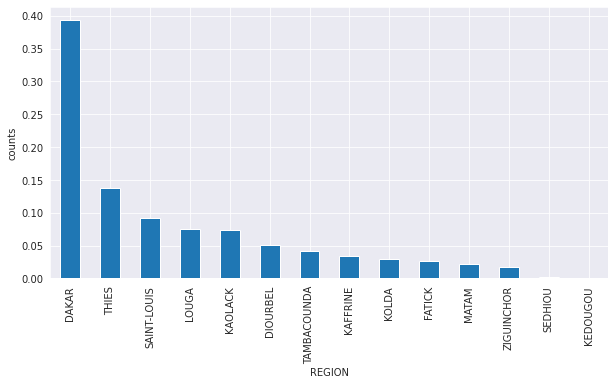

In [ ]:
print(train['REGION'].value_counts())
plt.figure(figsize=(10,5))
train['REGION'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('REGION')

K > 24 month     613231
I 18-21 month     13412
H 15-18 month      7753
G 12-15 month      4372
J 21-24 month      3875
F 9-12 month       2805
E 6-9 month         557
D 3-6 month         209
Name: TENURE, dtype: int64


Text(0.5, 0, 'TENURE')

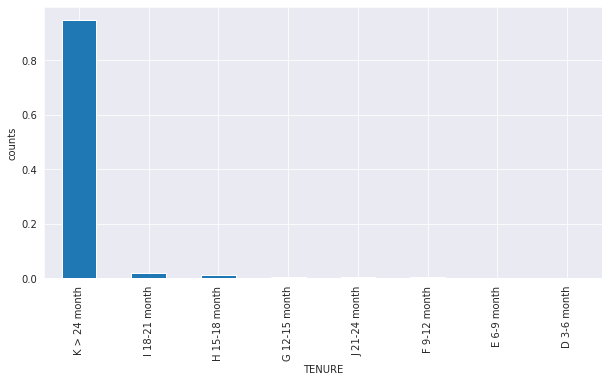

In [ ]:
print(train['TENURE'].value_counts())
plt.figure(figsize=(10,5))
train['TENURE'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TENURE')

NO    646214
Name: MRG, dtype: int64


Text(0.5, 0, 'MRG')

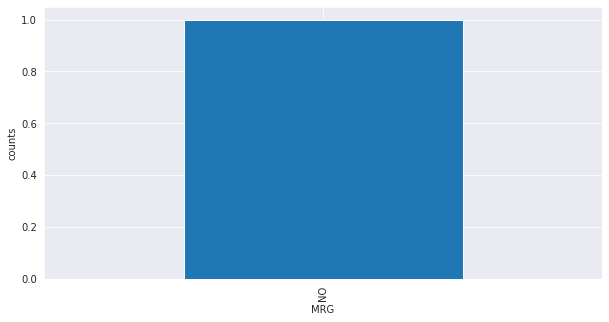

In [ ]:
print(train['MRG'].value_counts())
plt.figure(figsize=(10,5))
train['MRG'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('MRG')

All-net 500F=2000F;5d                  95425
On net 200F=Unlimited _call24H         45713
Data:490F=1GB,7d                       34513
Data: 100 F=40MB,24H                   25538
Mixt 250F=Unlimited_call24H            20033
                                       ...  
GPRS_5Go_7D_PORTAL                         1
ESN_POSTPAID_CLASSIC_RENT                  1
CVM_On-net 400f=2200F                      1
NEW_CLIR_TEMPALLOWED_LIBERTE_MOBILE        1
Data_Mifi_10Go_Monthly                     1
Name: TOP_PACK, Length: 119, dtype: int64


Text(0.5, 0, 'TOP_PACK')

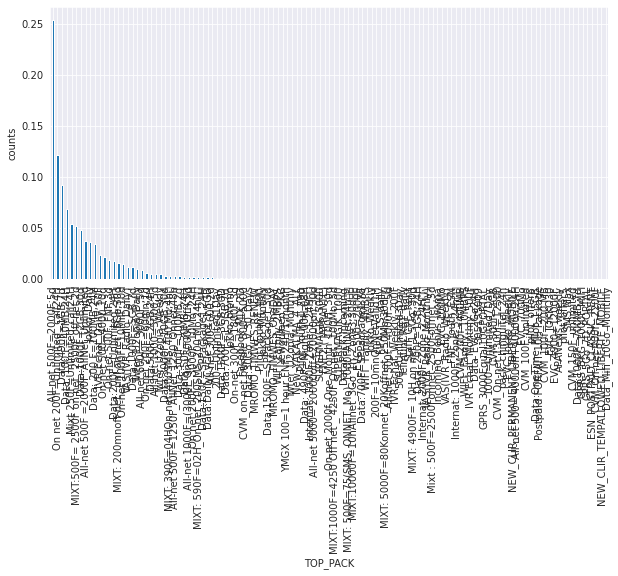

In [ ]:
#probaly not the best way to visualize this
print(train['TOP_PACK'].value_counts())
plt.figure(figsize=(10,5))
train['TOP_PACK'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TOP_PACK')

0    524912
1    121302
Name: CHURN, dtype: int64


Text(0.5, 0, 'Churn')

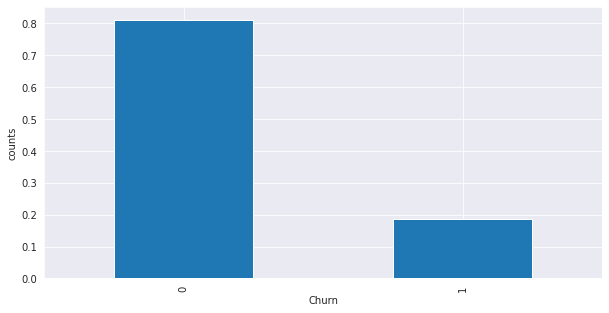

In [ ]:
#Check if the predictor class is balanced 
print(train['CHURN'].value_counts())
plt.figure(figsize=(10,5))
train['CHURN'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Churn')

In [ ]:
#Check summary of numerical fields
train.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,419154.0,5535.843227,7161.605662,10.0,1000.0,3000.0,7400.0,290500.0
FREQUENCE_RECH,419154.0,11.529891,13.270572,1.0,2.0,7.0,16.0,132.0
REVENUE,428459.0,5509.610712,7209.607287,1.0,1000.0,3000.0,7382.0,397968.0
ARPU_SEGMENT,428459.0,1836.543270,2403.197321,0.0,333.0,1000.0,2461.0,132656.0
FREQUENCE,428459.0,13.975855,14.689824,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,327544.0,3372.704974,13410.777186,0.0,0.0,260.0,2875.0,1823866.0
ON_NET,409962.0,277.649655,868.891990,0.0,5.0,27.0,157.0,36687.0
ORANGE,377516.0,95.274982,202.764409,0.0,7.0,29.0,99.0,6721.0
TIGO,259060.0,23.070601,63.219602,0.0,2.0,6.0,20.0,4174.0
ZONE1,50406.0,7.987779,39.546312,0.0,0.0,1.0,4.0,1867.0


In [ ]:
#Check for missing values in training data
train.isnull().sum()

user_id                0
REGION            254968
TENURE                 0
MONTANT           227060
FREQUENCE_RECH    227060
REVENUE           217755
ARPU_SEGMENT      217755
FREQUENCE         217755
DATA_VOLUME       318670
ON_NET            236252
ORANGE            268698
TIGO              387154
ZONE1             595808
ZONE2             605142
MRG                    0
REGULARITY             0
TOP_PACK          270883
FREQ_TOP_PACK     270883
CHURN                  0
dtype: int64

In [ ]:
#Check for missing values in test data
test.isnull().sum()

user_id                0
REGION             44957
TENURE                 0
MONTANT            39903
FREQUENCE_RECH     39903
REVENUE            38184
ARPU_SEGMENT       38184
FREQUENCE          38184
DATA_VOLUME        55989
ON_NET             41602
ORANGE             47215
TIGO               68130
ZONE1             105027
ZONE2             106821
MRG                    0
REGULARITY             0
TOP_PACK           47613
FREQ_TOP_PACK      47613
dtype: int64

In [ ]:
#We will drop REGION, TOP_PACK, and MRG
#We will also replace the missing values for the numerical columns with their means (averages)

In [ ]:
train.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True) #drop these columns

In [ ]:
train.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,51d5367a58953904c14238c4dd7393f5c4fd0a88,K > 24 month,1000.0,1.0,990.0,330.0,1.0,97.0,1.0,NaN,NaN,NaN,NaN,22,1.0,0
1,3322a4900689f7f3cb14b8f9ea00778853f02d75,K > 24 month,NaN,NaN,NaN,NaN,NaN,223.0,NaN,NaN,NaN,NaN,NaN,4,NaN,0
2,3b00ec4bfcc855c6f39b14a722e47ec6d15607e7,K > 24 month,700.0,5.0,1010.0,337.0,7.0,566.0,1.0,3.0,15.0,0.0,NaN,8,3.0,0
3,98c44b62c33c6a1d9dbcf5e918868419f249c4a8,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,0
4,18bd8c41ecb503a2d9137e3f70bc1caf146a266d,K > 24 month,3000.0,3.0,2995.0,998.0,3.0,NaN,NaN,33.0,NaN,NaN,NaN,9,NaN,0


In [ ]:
test.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True)

In [ ]:
test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,c1b31e7cef249f2b777d934886b787a433029263,K > 24 month,10600.0,18.0,11099.0,3700.0,22.0,4004.0,60.0,123.0,19.0,NaN,NaN,61,9.0
1,c205f3aff8486b0bed1051f3bf25fe04df7f671e,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,7.0,NaN,NaN,NaN,NaN,6,NaN
2,d743faaf50bbc43e02a08a2c2f4326f6d368fb25,K > 24 month,17900.0,36.0,18405.0,6135.0,44.0,0.0,446.0,50.0,28.0,2.0,NaN,62,9.0
3,c4e45ed21d5e2f64146b95fecbbb6b24740f803c,K > 24 month,10000.0,10.0,10001.0,3334.0,27.0,NaN,0.0,93.0,8.0,NaN,NaN,45,12.0
4,96c6a822243654ae1fe5f5f887089681f806cb46,K > 24 month,500.0,1.0,500.0,167.0,1.0,NaN,8.0,14.0,NaN,NaN,NaN,8,1.0


In [ ]:
#Fill NAs for train data

In [ ]:
train['MONTANT'].fillna((train['MONTANT'].mean()), inplace=True)
train['FREQUENCE_RECH'].fillna((train['FREQUENCE_RECH'].mean()), inplace=True)
train['REVENUE'].fillna((train['REVENUE'].mean()), inplace=True)
train['ARPU_SEGMENT'].fillna((train['ARPU_SEGMENT'].mean()), inplace=True)
train['FREQUENCE'].fillna((train['FREQUENCE'].mean()), inplace=True)
train['DATA_VOLUME'].fillna((train['DATA_VOLUME'].mean()), inplace=True)
train['ON_NET'].fillna((train['ON_NET'].mean()), inplace=True)
train['ORANGE'].fillna((train['ORANGE'].mean()), inplace=True)
train['TIGO'].fillna((train['TIGO'].mean()), inplace=True)
train['ZONE1'].fillna((train['ZONE1'].mean()), inplace=True)
train['ZONE2'].fillna((train['ZONE2'].mean()), inplace=True)
train['FREQ_TOP_PACK'].fillna((train['FREQ_TOP_PACK'].mean()), inplace=True)

In [ ]:
train.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,51d5367a58953904c14238c4dd7393f5c4fd0a88,K > 24 month,1000.000000,1.000000,990.000000,330.00000,1.000000,97.000000,1.000000,95.274982,23.070601,7.987779,7.547478,22,1.000000,0
1,3322a4900689f7f3cb14b8f9ea00778853f02d75,K > 24 month,5535.843227,11.529891,5509.610712,1836.54327,13.975855,223.000000,277.649655,95.274982,23.070601,7.987779,7.547478,4,9.284301,0
2,3b00ec4bfcc855c6f39b14a722e47ec6d15607e7,K > 24 month,700.000000,5.000000,1010.000000,337.00000,7.000000,566.000000,1.000000,3.000000,15.000000,0.000000,7.547478,8,3.000000,0
3,98c44b62c33c6a1d9dbcf5e918868419f249c4a8,K > 24 month,5535.843227,11.529891,5509.610712,1836.54327,13.975855,3372.704974,277.649655,95.274982,23.070601,7.987779,7.547478,3,9.284301,0
4,18bd8c41ecb503a2d9137e3f70bc1caf146a266d,K > 24 month,3000.000000,3.000000,2995.000000,998.00000,3.000000,3372.704974,277.649655,33.000000,23.070601,7.987779,7.547478,9,9.284301,0


In [ ]:
train.isnull().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [ ]:
#Fill NAs for test data

In [ ]:
test['MONTANT'].fillna((test['MONTANT'].mean()), inplace=True)
test['FREQUENCE_RECH'].fillna((test['FREQUENCE_RECH'].mean()), inplace=True)
test['REVENUE'].fillna((test['REVENUE'].mean()), inplace=True)
test['ARPU_SEGMENT'].fillna((test['ARPU_SEGMENT'].mean()), inplace=True)
test['FREQUENCE'].fillna((test['FREQUENCE'].mean()), inplace=True)
test['DATA_VOLUME'].fillna((test['DATA_VOLUME'].mean()), inplace=True)
test['ON_NET'].fillna((test['ON_NET'].mean()), inplace=True)
test['ORANGE'].fillna((test['ORANGE'].mean()), inplace=True)
test['TIGO'].fillna((test['TIGO'].mean()), inplace=True)
test['ZONE1'].fillna((test['ZONE1'].mean()), inplace=True)
test['ZONE2'].fillna((test['ZONE2'].mean()), inplace=True)
test['FREQ_TOP_PACK'].fillna((test['FREQ_TOP_PACK'].mean()), inplace=True)

In [ ]:
test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,c1b31e7cef249f2b777d934886b787a433029263,K > 24 month,10600.000000,18.000000,11099.000000,3700.0000,22.000000,4004.000000,60.0,123.000000,19.00000,8.381978,7.90176,61,9.000000
1,c205f3aff8486b0bed1051f3bf25fe04df7f671e,K > 24 month,5550.617468,11.517461,5526.134851,1842.0492,13.945408,0.000000,7.0,95.608847,23.02566,8.381978,7.90176,6,9.302431
2,d743faaf50bbc43e02a08a2c2f4326f6d368fb25,K > 24 month,17900.000000,36.000000,18405.000000,6135.0000,44.000000,0.000000,446.0,50.000000,28.00000,2.000000,7.90176,62,9.000000
3,c4e45ed21d5e2f64146b95fecbbb6b24740f803c,K > 24 month,10000.000000,10.000000,10001.000000,3334.0000,27.000000,3387.740685,0.0,93.000000,8.00000,8.381978,7.90176,45,12.000000
4,96c6a822243654ae1fe5f5f887089681f806cb46,K > 24 month,500.000000,1.000000,500.000000,167.0000,1.000000,3387.740685,8.0,14.000000,23.02566,8.381978,7.90176,8,1.000000


In [ ]:
test.isnull().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
dtype: int64

## Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dropcols = ['user_id', 'CHURN']
y = train['CHURN']
x = train.drop(columns=dropcols, axis=1)
test = test.drop(columns=['user_id'], axis=1) #you will use this for predicting and submitting the resulting
print(x.shape)
print(y.shape)
print(test.shape)

(646214, 14)
(646214,)
(114038, 14)


In [ ]:
#Split training data into train and test split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.5,random_state=1)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(323107, 14)
(323107,)
(323107, 14)
(323107,)


In [ ]:
#Further split X_train and y_train into train and validation sets

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.3, random_state=1)

In [ ]:
X_train

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
383784,H 15-18 month,5535.843227,11.529891,5509.610712,1836.54327,13.975855,3372.704974,277.649655,95.274982,23.070601,7.987779,7.547478,7,9.284301
63445,K > 24 month,1500.000000,3.000000,1301.000000,434.00000,3.000000,0.000000,29.000000,9.000000,26.000000,7.987779,7.547478,44,2.000000
572791,K > 24 month,2000.000000,2.000000,951.000000,317.00000,4.000000,3372.704974,37.000000,32.000000,6.000000,7.987779,7.547478,22,9.284301
256585,J 21-24 month,5000.000000,10.000000,4500.000000,1500.00000,10.000000,0.000000,165.000000,116.000000,10.000000,7.987779,7.547478,51,8.000000
112890,K > 24 month,5535.843227,11.529891,5509.610712,1836.54327,13.975855,0.000000,277.649655,95.274982,23.070601,7.987779,7.547478,48,9.284301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26340,K > 24 month,4425.000000,9.000000,4410.000000,1470.00000,8.000000,0.000000,3.000000,43.000000,0.000000,7.987779,4.000000,27,1.000000
378246,K > 24 month,5535.843227,11.529891,5509.610712,1836.54327,13.975855,3372.704974,277.649655,95.274982,23.070601,7.987779,7.547478,34,9.284301
27236,K > 24 month,5535.843227,11.529891,500.000000,167.00000,1.000000,0.000000,2.000000,95.274982,23.070601,7.987779,7.547478,41,1.000000
581462,K > 24 month,3800.000000,5.000000,3500.000000,1167.00000,9.000000,3372.704974,212.000000,95.274982,23.070601,7.987779,7.547478,43,4.000000


In [ ]:
print("train")
print(X_train.shape)
print(y_train.shape)
print("+"*7)
print("test")
print(X_test.shape)
print(y_test.shape)
print("+"*7)
print("validation")
print(X_val.shape)
print(y_val.shape)

train
(226174, 14)
(226174,)
+++++++
test
(323107, 14)
(323107,)
+++++++
validation
(96933, 14)
(96933,)


In [ ]:
#Standardize numeric columns

In [ ]:
num_cols = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2',
       'REGULARITY', 'FREQ_TOP_PACK']

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [ ]:
y

In [ ]:
X_train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
383784,H 15-18 month,0.001349,0.000374,0.000741,0.000741,0.000815,0.003011,-0.000800,-0.001466,0.001612,-0.001386,0.002724,-0.945425,-0.000370
63445,K > 24 month,-0.709067,-0.797679,-0.723054,-0.722887,-0.917718,-0.387884,-0.362957,-0.552189,0.075961,-0.001386,0.002724,0.714842,-0.765190
572791,K > 24 month,-0.621054,-0.891239,-0.783247,-0.783252,-0.834031,0.003011,-0.351305,-0.405372,-0.431643,-0.001386,0.002724,-0.272344,-0.000370
256585,J 21-24 month,-0.092974,-0.142762,-0.172891,-0.172895,-0.331911,-0.387884,-0.164874,0.130829,-0.330122,-0.001386,0.002724,1.028946,-0.135216
112890,K > 24 month,0.001349,0.000374,0.000741,0.000741,0.000815,-0.387884,-0.000800,-0.001466,0.001612,-0.001386,0.002724,0.894330,-0.000370


In [ ]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
X_test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
173299,K > 24 month,0.001349,0.000374,0.000741,0.000741,0.000815,0.003011,-0.000800,-0.001466,0.001612,-0.001386,0.002724,-0.227472,-0.000370
561166,K > 24 month,-0.849888,-0.891239,-0.826414,-0.826591,-1.001405,-0.387884,-0.294502,-0.001466,0.001612,-0.001386,0.002724,0.894330,-0.870186
426016,K > 24 month,0.083053,-0.236322,0.085078,0.085075,0.086522,0.176199,-0.378979,-0.418139,-0.558544,-0.001386,0.002724,1.477667,-0.555199
310004,I 18-21 month,0.001349,0.000374,0.000741,0.000741,0.000815,-0.387884,-0.400826,-0.001466,0.001612,-0.001386,0.002724,-0.137728,-0.000370
117643,K > 24 month,0.001349,0.000374,-0.936309,-0.936486,-1.085091,0.003011,-0.000800,-0.001466,0.001612,-0.001386,0.002724,-1.169785,-0.000370


In [ ]:
test[num_cols] = scaler.transform(test[num_cols])

In [ ]:
test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,K > 24 month,0.892775,0.605714,0.962003,0.962173,0.672329,0.076178,-0.317806,0.175512,-0.101701,0.030737,0.049737,1.477667,-0.030220
1,K > 24 month,0.003950,-0.000789,0.003583,0.003582,-0.001733,-0.387884,-0.395000,0.000665,0.000471,0.030737,0.049737,-0.990297,0.001534
2,K > 24 month,2.177769,2.289787,2.218487,2.218488,2.513435,-0.387884,0.244402,-0.290472,0.126721,-0.489327,0.049737,1.522539,-0.030220
3,K > 24 month,0.787159,-0.142762,0.773169,0.773339,1.090762,0.004753,-0.405196,-0.015988,-0.380883,0.030737,0.049737,0.759714,0.284767
4,K > 24 month,-0.885093,-0.984798,-0.860810,-0.860643,-1.085091,0.004753,-0.393544,-0.520272,0.000471,0.030737,0.049737,-0.900553,-0.870186


In [ ]:
x[num_cols]=scaler.transform(x[num_cols])

In [ ]:
X_val[num_cols] = scaler.transform(X_val[num_cols])

In [ ]:
X_val.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
158645,K > 24 month,-0.753073,-0.704120,-0.729590,-0.729594,-0.666658,-0.384987,-0.403739,-0.143655,0.001612,-0.001386,0.002724,-0.676192,-0.555199
291652,K > 24 month,-0.726669,-0.329881,-0.672492,-0.672325,-0.331911,-0.385682,-0.309067,-0.290472,0.001612,-0.001386,0.002724,0.041761,-0.240211
172801,K > 24 month,-0.748673,-0.797679,-0.725806,-0.725983,-0.248225,0.003011,-0.384805,-0.571339,-0.558544,-0.001386,0.002724,-0.137728,-0.870186
14972,K > 24 month,-0.269000,-0.423441,-0.259225,-0.259057,-0.164538,-0.387884,-0.233329,-0.424522,-0.050940,-0.001386,0.002724,0.490481,-0.450203
121,K > 24 month,-0.673862,-0.517000,-0.736641,-0.736817,-0.666658,-0.387768,0.046318,-0.437289,-0.177841,-0.001386,0.002724,1.073818,-0.345207


In [ ]:
#Encode the TENURE column

In [ ]:
x

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,K > 24 month,-0.797080,-0.984798,-0.776540,-0.776545,-1.085091,-0.376642,-0.403739,-0.001466,0.001612,-0.001386,0.002724,-0.272344,-0.870186
1,K > 24 month,0.001349,0.000374,0.000741,0.000741,0.000815,-0.362039,-0.000800,-0.001466,0.001612,-0.001386,0.002724,-1.080041,-0.000370
2,K > 24 month,-0.849888,-0.610560,-0.773101,-0.772933,-0.582971,-0.322285,-0.403739,-0.590489,-0.203221,-0.652306,0.002724,-0.900553,-0.660194
3,K > 24 month,0.001349,0.000374,0.000741,0.000741,0.000815,0.003011,-0.000800,-0.001466,0.001612,-0.001386,0.002724,-1.124913,-0.000370
4,K > 24 month,-0.445027,-0.797679,-0.431721,-0.431897,-0.917718,0.003011,-0.000800,-0.398989,0.001612,-0.001386,0.002724,-0.855681,-0.000370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646209,K > 24 month,0.001349,0.000374,0.000741,0.000741,0.000815,0.003011,-0.000800,-0.001466,0.001612,-0.001386,0.002724,-1.214657,-0.000370
646210,K > 24 month,-0.709067,-0.797679,-0.688830,-0.688835,-0.917718,0.003011,-0.364414,-0.271322,0.001612,-0.001386,0.002724,0.176377,-0.765190
646211,K > 24 month,1.315239,1.354191,1.460916,1.461088,1.007075,0.003011,3.924972,0.558513,0.685085,-0.001386,0.002724,1.343050,0.599755
646212,K > 24 month,-0.427424,-0.704120,-0.425186,-0.425190,-0.834031,1.107800,-0.000800,-0.609639,0.001612,-0.001386,0.002724,-0.182600,-0.660194


In [ ]:
encoder = LabelEncoder()
X_train["TENURE"] = encoder.fit_transform(X_train["TENURE"])

In [ ]:
x['TENURE']=encoder.fit_transform(x["TENURE"])

In [ ]:
X_test["TENURE"] = encoder.transform(X_test["TENURE"])

In [ ]:
X_val['TENURE'] = encoder.transform(X_val["TENURE"])

In [ ]:
test['TENURE'] = encoder.transform(test["TENURE"])

In [ ]:
X_train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
383784,4,0.001349,0.000374,0.000741,0.000741,0.000815,0.003011,-0.000800,-0.001466,0.001612,-0.001386,0.002724,-0.945425,-0.000370
63445,7,-0.709067,-0.797679,-0.723054,-0.722887,-0.917718,-0.387884,-0.362957,-0.552189,0.075961,-0.001386,0.002724,0.714842,-0.765190
572791,7,-0.621054,-0.891239,-0.783247,-0.783252,-0.834031,0.003011,-0.351305,-0.405372,-0.431643,-0.001386,0.002724,-0.272344,-0.000370
256585,6,-0.092974,-0.142762,-0.172891,-0.172895,-0.331911,-0.387884,-0.164874,0.130829,-0.330122,-0.001386,0.002724,1.028946,-0.135216
112890,7,0.001349,0.000374,0.000741,0.000741,0.000815,-0.387884,-0.000800,-0.001466,0.001612,-0.001386,0.002724,0.894330,-0.000370


In [ ]:
x

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,7,-0.797080,-0.984798,-0.776540,-0.776545,-1.085091,-0.376642,-0.403739,-0.001466,0.001612,-0.001386,0.002724,-0.272344,-0.870186
1,7,0.001349,0.000374,0.000741,0.000741,0.000815,-0.362039,-0.000800,-0.001466,0.001612,-0.001386,0.002724,-1.080041,-0.000370
2,7,-0.849888,-0.610560,-0.773101,-0.772933,-0.582971,-0.322285,-0.403739,-0.590489,-0.203221,-0.652306,0.002724,-0.900553,-0.660194
3,7,0.001349,0.000374,0.000741,0.000741,0.000815,0.003011,-0.000800,-0.001466,0.001612,-0.001386,0.002724,-1.124913,-0.000370
4,7,-0.445027,-0.797679,-0.431721,-0.431897,-0.917718,0.003011,-0.000800,-0.398989,0.001612,-0.001386,0.002724,-0.855681,-0.000370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646209,7,0.001349,0.000374,0.000741,0.000741,0.000815,0.003011,-0.000800,-0.001466,0.001612,-0.001386,0.002724,-1.214657,-0.000370
646210,7,-0.709067,-0.797679,-0.688830,-0.688835,-0.917718,0.003011,-0.364414,-0.271322,0.001612,-0.001386,0.002724,0.176377,-0.765190
646211,7,1.315239,1.354191,1.460916,1.461088,1.007075,0.003011,3.924972,0.558513,0.685085,-0.001386,0.002724,1.343050,0.599755
646212,7,-0.427424,-0.704120,-0.425186,-0.425190,-0.834031,1.107800,-0.000800,-0.609639,0.001612,-0.001386,0.002724,-0.182600,-0.660194


In [ ]:
test

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,7,0.892775,0.605714,0.962003,0.962173,0.672329,0.076178,-0.317806,0.175512,-0.101701,0.030737,0.049737,1.477667,-0.030220
1,7,0.003950,-0.000789,0.003583,0.003582,-0.001733,-0.387884,-0.395000,0.000665,0.000471,0.030737,0.049737,-0.990297,0.001534
2,7,2.177769,2.289787,2.218487,2.218488,2.513435,-0.387884,0.244402,-0.290472,0.126721,-0.489327,0.049737,1.522539,-0.030220
3,7,0.787159,-0.142762,0.773169,0.773339,1.090762,0.004753,-0.405196,-0.015988,-0.380883,0.030737,0.049737,0.759714,0.284767
4,7,-0.885093,-0.984798,-0.860810,-0.860643,-1.085091,0.004753,-0.393544,-0.520272,0.000471,0.030737,0.049737,-0.900553,-0.870186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114033,7,-0.937901,-0.984798,0.003583,0.003582,-0.001733,0.004753,-0.001496,0.000665,0.000471,0.030737,0.049737,-1.035169,0.001534
114034,7,0.003950,-0.000789,0.003583,0.003582,-0.001733,0.004753,-0.001496,0.000665,0.000471,0.030737,0.049737,-0.990297,0.001534
114035,7,-0.585848,-0.891239,-0.344699,-0.344703,-0.834031,0.436162,-0.403739,0.000665,-0.177841,0.030737,0.049737,1.387923,-0.765190
114036,7,0.751954,0.886393,0.752188,0.752186,0.588642,1.773759,-0.351305,-0.609639,0.000471,0.030737,0.049737,1.477667,0.599755


In [ ]:
class func() :   
    def __init__(self, train, label, test, model, model_type, random_state):
        self.train, self.label, self.test = train, label, test
        self.model, self.model_type = model, model_type
        self.random_state = random_state
        
        assert self.model_type in ('catboost', 'xgboost', 'lgbm'), 'Incorrect model_type'
    def __call__(self, plot = True):
        return self.fit(plot)

    def fit(self, plot):
        def catboost_fit(X_train, X_test, y_train, y_test):
            self.model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=500,
                           verbose=50,use_best_model=True)
            x_test_predict = self.model.predict_proba(X_test)[:,1]
            x_train_predict = self.model.predict_proba(X_train)[:,1]
            self.val_p[test_index] = x_test_predict
            self.test_p += self.model.predict_proba(self.test)[:,1]
            return x_test_predict, x_train_predict

        def xgboost_fit(X_train, X_test, y_train, y_test):
            self.model.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric="auc",
                           eval_set=[(X_test, y_test)], verbose = True)
            x_test_predict = self.model.predict_proba(X_test, ntree_limit = self.model.get_booster().best_ntree_limit)[:,1]
            x_train_predict = self.model.predict_proba(X_train, ntree_limit = self.model.get_booster().best_ntree_limit)[:,1]
            self.val_p[test_index] = x_test_predict
            self.test_p += self.model.predict_proba(self.test, ntree_limit = self.model.get_booster().best_ntree_limit)[:,1]
            return x_test_predict, x_train_predict

        def lgbm_fit(X_train, X_test, y_train, y_test):
            self.model.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric="auc",
                           eval_set=[(X_test, y_test)], verbose = True)
            x_test_predict = self.model.predict_proba(X_test, num_iteration = self.model.best_iteration_)[:,1]
            x_train_predict = self.model.predict_proba(X_train, num_iteration = self.model.best_iteration_)[:,1]
            self.val_p[test_index] = x_test_predict
            self.test_p += self.model.predict_proba(self.test, num_iteration = self.model.best_iteration_)[:,1]
            return x_test_predict, x_train_predict

        self.val_p = np.zeros(self.train.shape[0])
        mean_val = []
        mean_train = []
        self.test_p = np.zeros(self.test.shape[0])
        splits = 5
        kf = StratifiedKFold(n_splits = splits)
        for fold_count, (train_index, test_index) in enumerate(kf.split(self.train, self.label)):
            X_train,X_test = self.train.iloc[train_index],self.train.iloc[test_index]
            y_train,y_test = self.label.iloc[train_index],self.label.iloc[test_index]

            print(f"================================Fold{fold_count+1}====================================")
            if self.model_type == 'catboost': x_test_predict, x_train_predict = catboost_fit(X_train, X_test, y_train, y_test)
            elif self.model_type == 'xgboost': x_test_predict, x_train_predict = xgboost_fit(X_train, X_test, y_train, y_test)
            elif self.model_type == 'lgbm': x_test_predict, x_train_predict = lgbm_fit(X_train, X_test, y_train, y_test)

            print('\nValidation scores', roc_auc_score(y_test, x_test_predict), log_loss(y_test, x_test_predict))
            print('Training scores', roc_auc_score(y_train, x_train_predict), log_loss(y_train, x_train_predict))
            mean_val.append(roc_auc_score(y_test, x_test_predict))
            mean_train.append(roc_auc_score(y_train, x_train_predict))

        if plot:
            feat_imp = pd.DataFrame(sorted(zip(self.model.feature_importances_,self.train.columns)), columns=['Value','Feature'])
            plt.figure(figsize=(30,25))
            sns.barplot(x="Value", y="Feature", data=feat_imp.sort_values(by="Value", ascending=False))
            plt.ylabel('Feature Importance Score')
            plt.show()
        print(np.mean(mean_val), np.mean(mean_train), np.std(mean_val))
        return self.val_p, self.test_p/splits, self.model

================================Fold1====================================
0:	test: 0.8846822	best: 0.8846822 (0)	total: 271ms	remaining: 45m 14s
50:	test: 0.8990435	best: 0.8990435 (50)	total: 12.1s	remaining: 39m 25s
100:	test: 0.9004069	best: 0.9004069 (100)	total: 23.4s	remaining: 38m 9s
150:	test: 0.9008688	best: 0.9008688 (150)	total: 34.1s	remaining: 37m 3s
200:	test: 0.9011623	best: 0.9011623 (200)	total: 45.3s	remaining: 36m 47s
250:	test: 0.9013481	best: 0.9013481 (250)	total: 56.6s	remaining: 36m 39s
300:	test: 0.9014879	best: 0.9014879 (300)	total: 1m 7s	remaining: 36m 20s
350:	test: 0.9016019	best: 0.9016019 (350)	total: 1m 19s	remaining: 36m 28s
400:	test: 0.9016945	best: 0.9016945 (400)	total: 1m 30s	remaining: 36m 1s
450:	test: 0.9017681	best: 0.9017684 (449)	total: 1m 41s	remaining: 35m 56s
500:	test: 0.9018616	best: 0.9018616 (500)	total: 1m 53s	remaining: 35m 54s
550:	test: 0.9018926	best: 0.9018926 (550)	total: 2m 5s	remaining: 35m 57s
600:	test: 0.9019316	best: 0.90

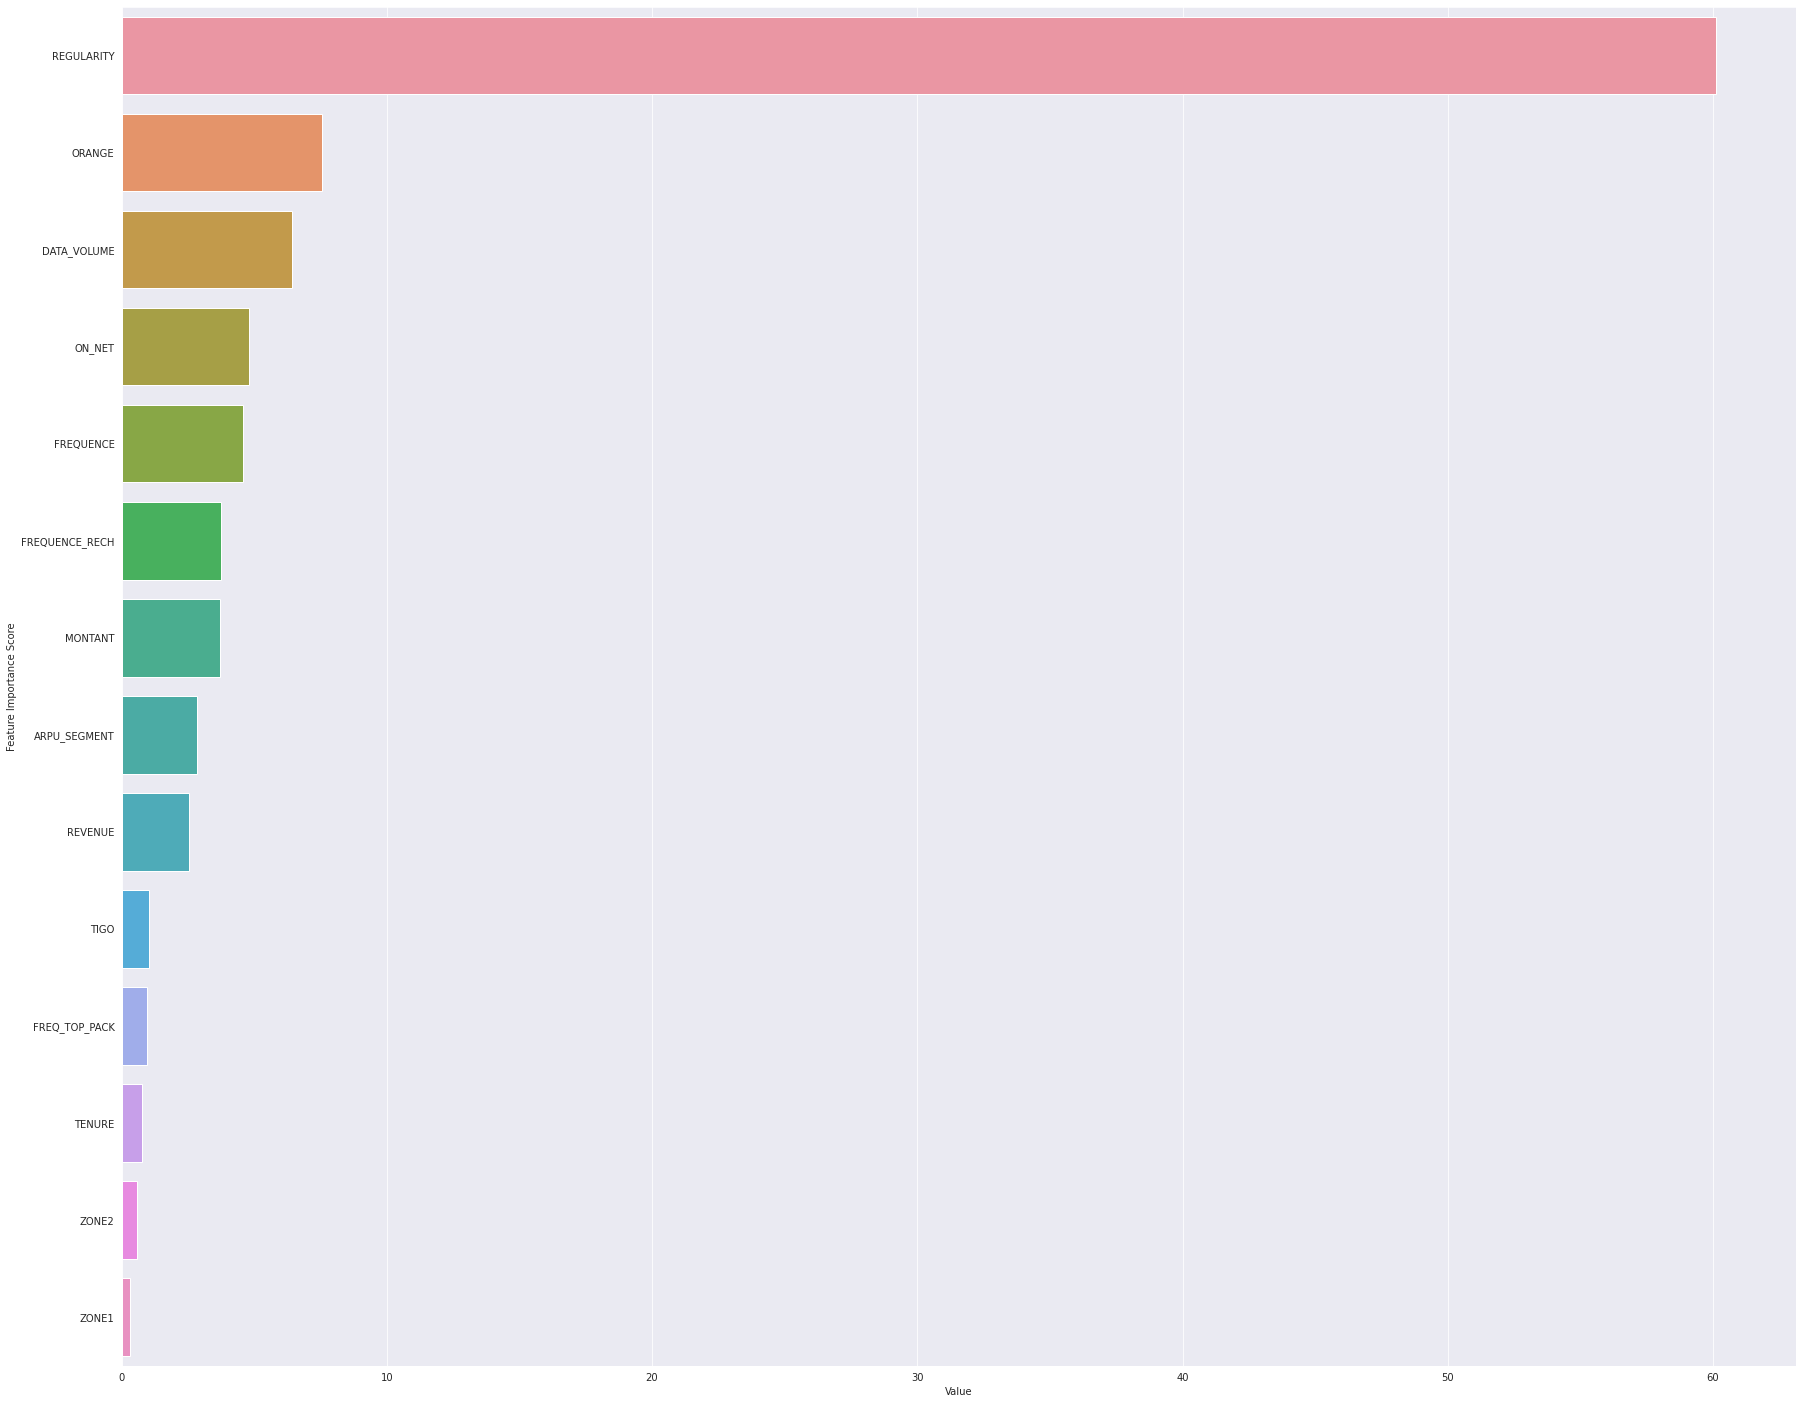

0.9020701746865655 0.9031631564345668 0.0005129169086604261


In [ ]:
catboost = cat_.CatBoostClassifier(n_estimators=10000, max_depth=6, eval_metric='AUC', reg_lambda = 370, devices='0:1')

func_= func(x, y, test, catboost, 'catboost', 1000)
val_p, test_p, model1 = func_()

================================Fold1====================================
[0]	validation_0-auc:0.825071
Will train until validation_0-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.885876
[2]	validation_0-auc:0.888484
[3]	validation_0-auc:0.889672
[4]	validation_0-auc:0.892317
[5]	validation_0-auc:0.894017
[6]	validation_0-auc:0.895114
[7]	validation_0-auc:0.895449
[8]	validation_0-auc:0.895075
[9]	validation_0-auc:0.896069
[10]	validation_0-auc:0.896692
[11]	validation_0-auc:0.897512
[12]	validation_0-auc:0.898011
[13]	validation_0-auc:0.897778
[14]	validation_0-auc:0.898256
[15]	validation_0-auc:0.898463
[16]	validation_0-auc:0.89821
[17]	validation_0-auc:0.898357
[18]	validation_0-auc:0.898759
[19]	validation_0-auc:0.898903
[20]	validation_0-auc:0.899314
[21]	validation_0-auc:0.899337
[22]	validation_0-auc:0.899301
[23]	validation_0-auc:0.899162
[24]	validation_0-auc:0.899451
[25]	validation_0-auc:0.899628
[26]	validation_0-auc:0.899752
[27]	validation_0-auc:0.899905
[28]	

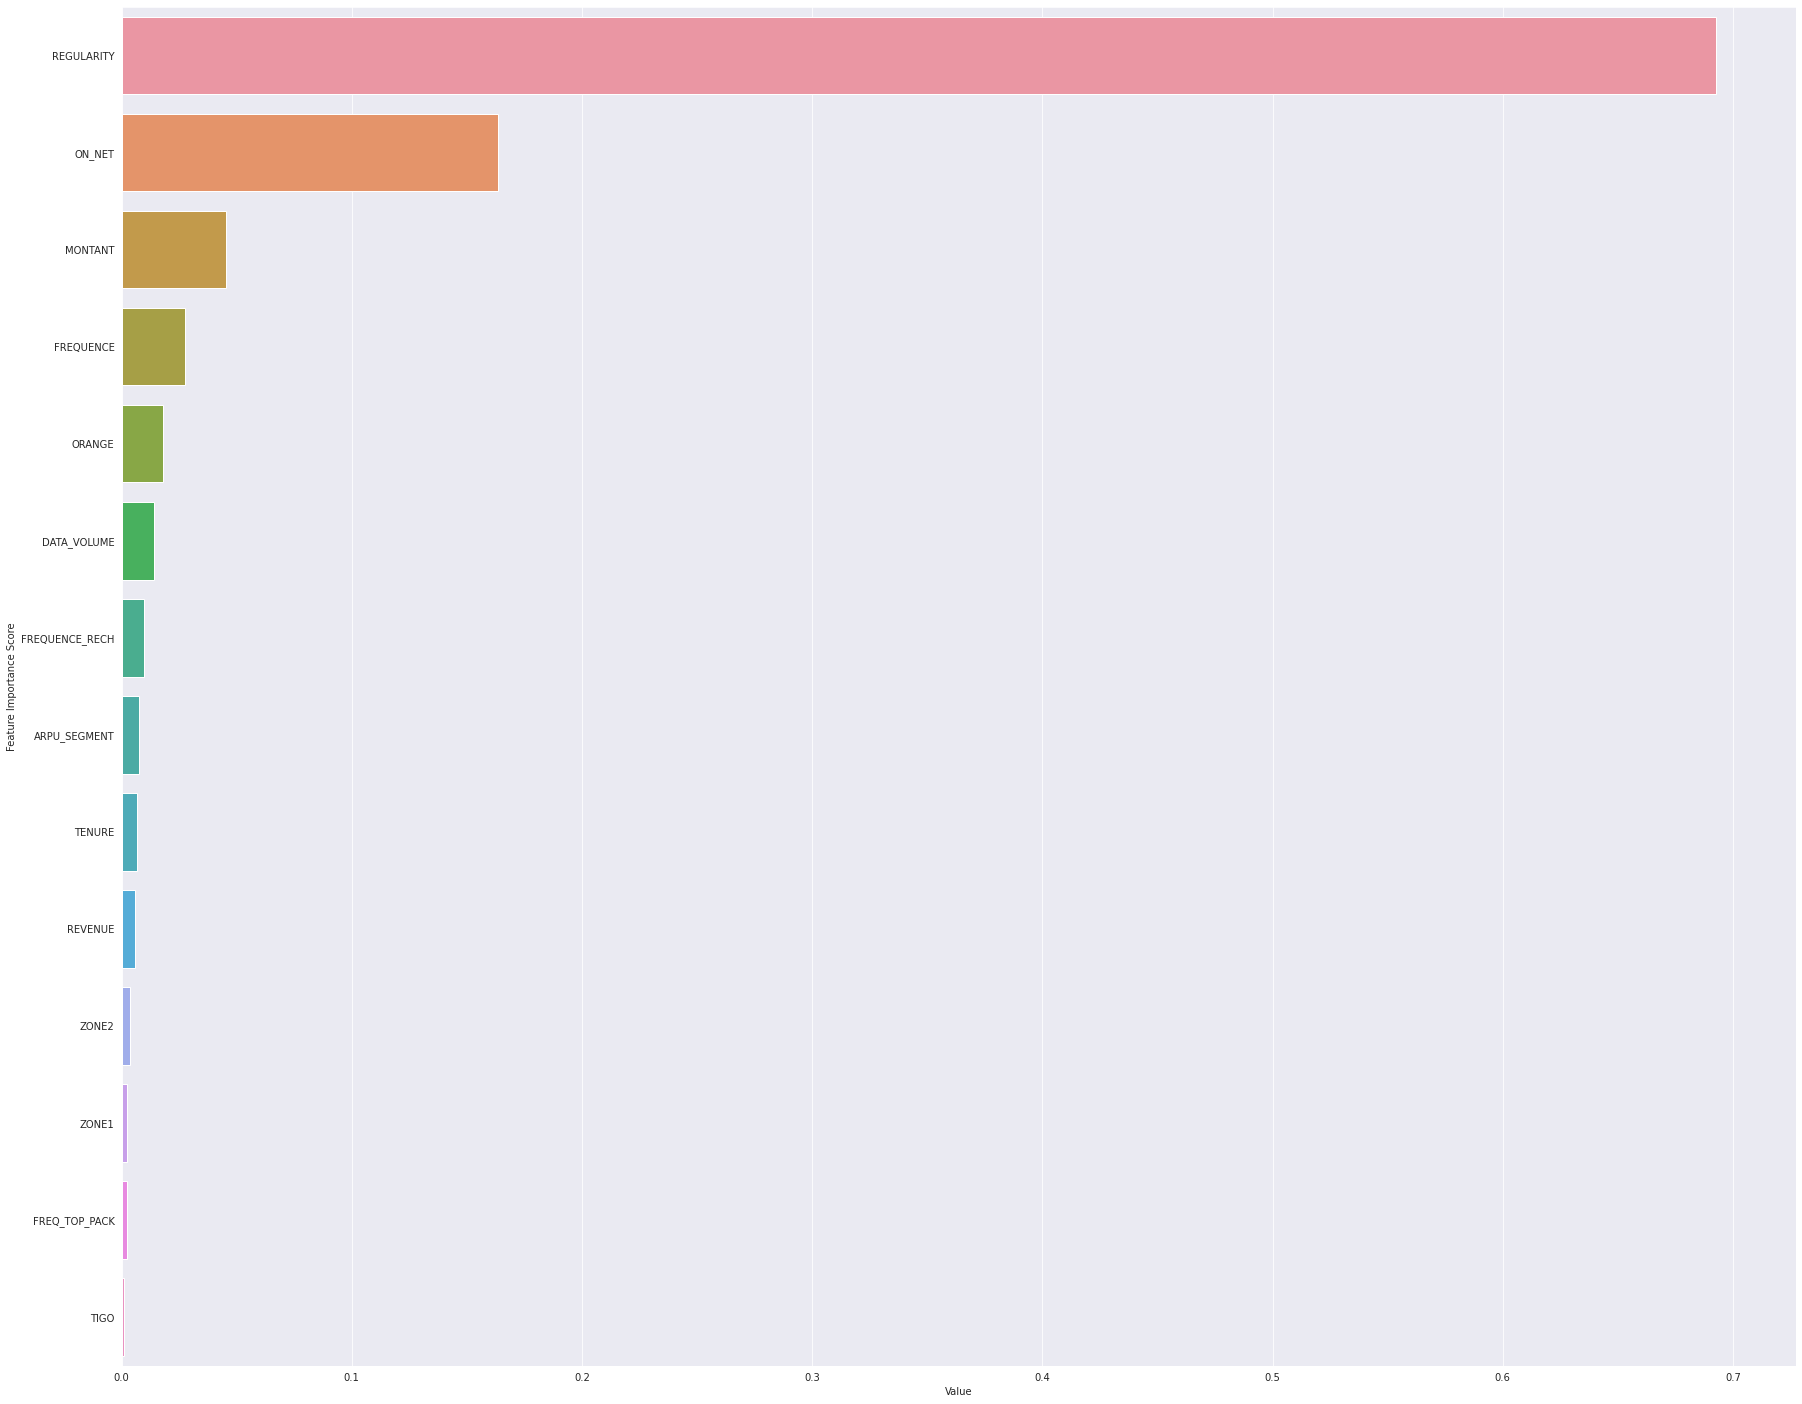

0.9021100042601364 0.9039646756740674 0.00048133599919723407


In [ ]:
xgboost = XGBClassifier(objective ='binary:logistic', 
                          eta = 0.99,
                          max_depth = 6, 
                          n_estimators = 5000,
                          reg_lambda = 500,
                          sub_sample = 0.8,
                          colsample_bytree = 0.8)

func_= func(x, y, test, xgboost, 'xgboost', 1000)
val_p2, test_p2, model2 = func_()

================================Fold1====================================
[1]	valid_0's auc: 0.893684
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.894734
[3]	valid_0's auc: 0.896832
[4]	valid_0's auc: 0.897117
[5]	valid_0's auc: 0.897707
[6]	valid_0's auc: 0.897771
[7]	valid_0's auc: 0.898152
[8]	valid_0's auc: 0.898327
[9]	valid_0's auc: 0.89849
[10]	valid_0's auc: 0.898679
[11]	valid_0's auc: 0.898931
[12]	valid_0's auc: 0.89904
[13]	valid_0's auc: 0.899113
[14]	valid_0's auc: 0.899144
[15]	valid_0's auc: 0.899408
[16]	valid_0's auc: 0.899521
[17]	valid_0's auc: 0.899585
[18]	valid_0's auc: 0.899648
[19]	valid_0's auc: 0.899674
[20]	valid_0's auc: 0.89972
[21]	valid_0's auc: 0.89976
[22]	valid_0's auc: 0.899836
[23]	valid_0's auc: 0.899922
[24]	valid_0's auc: 0.899977
[25]	valid_0's auc: 0.900013
[26]	valid_0's auc: 0.900145
[27]	valid_0's auc: 0.900231
[28]	valid_0's auc: 0.900327
[29]	valid_0's auc: 0.900386
[30]	valid_0's auc: 0.900449
[31]	va

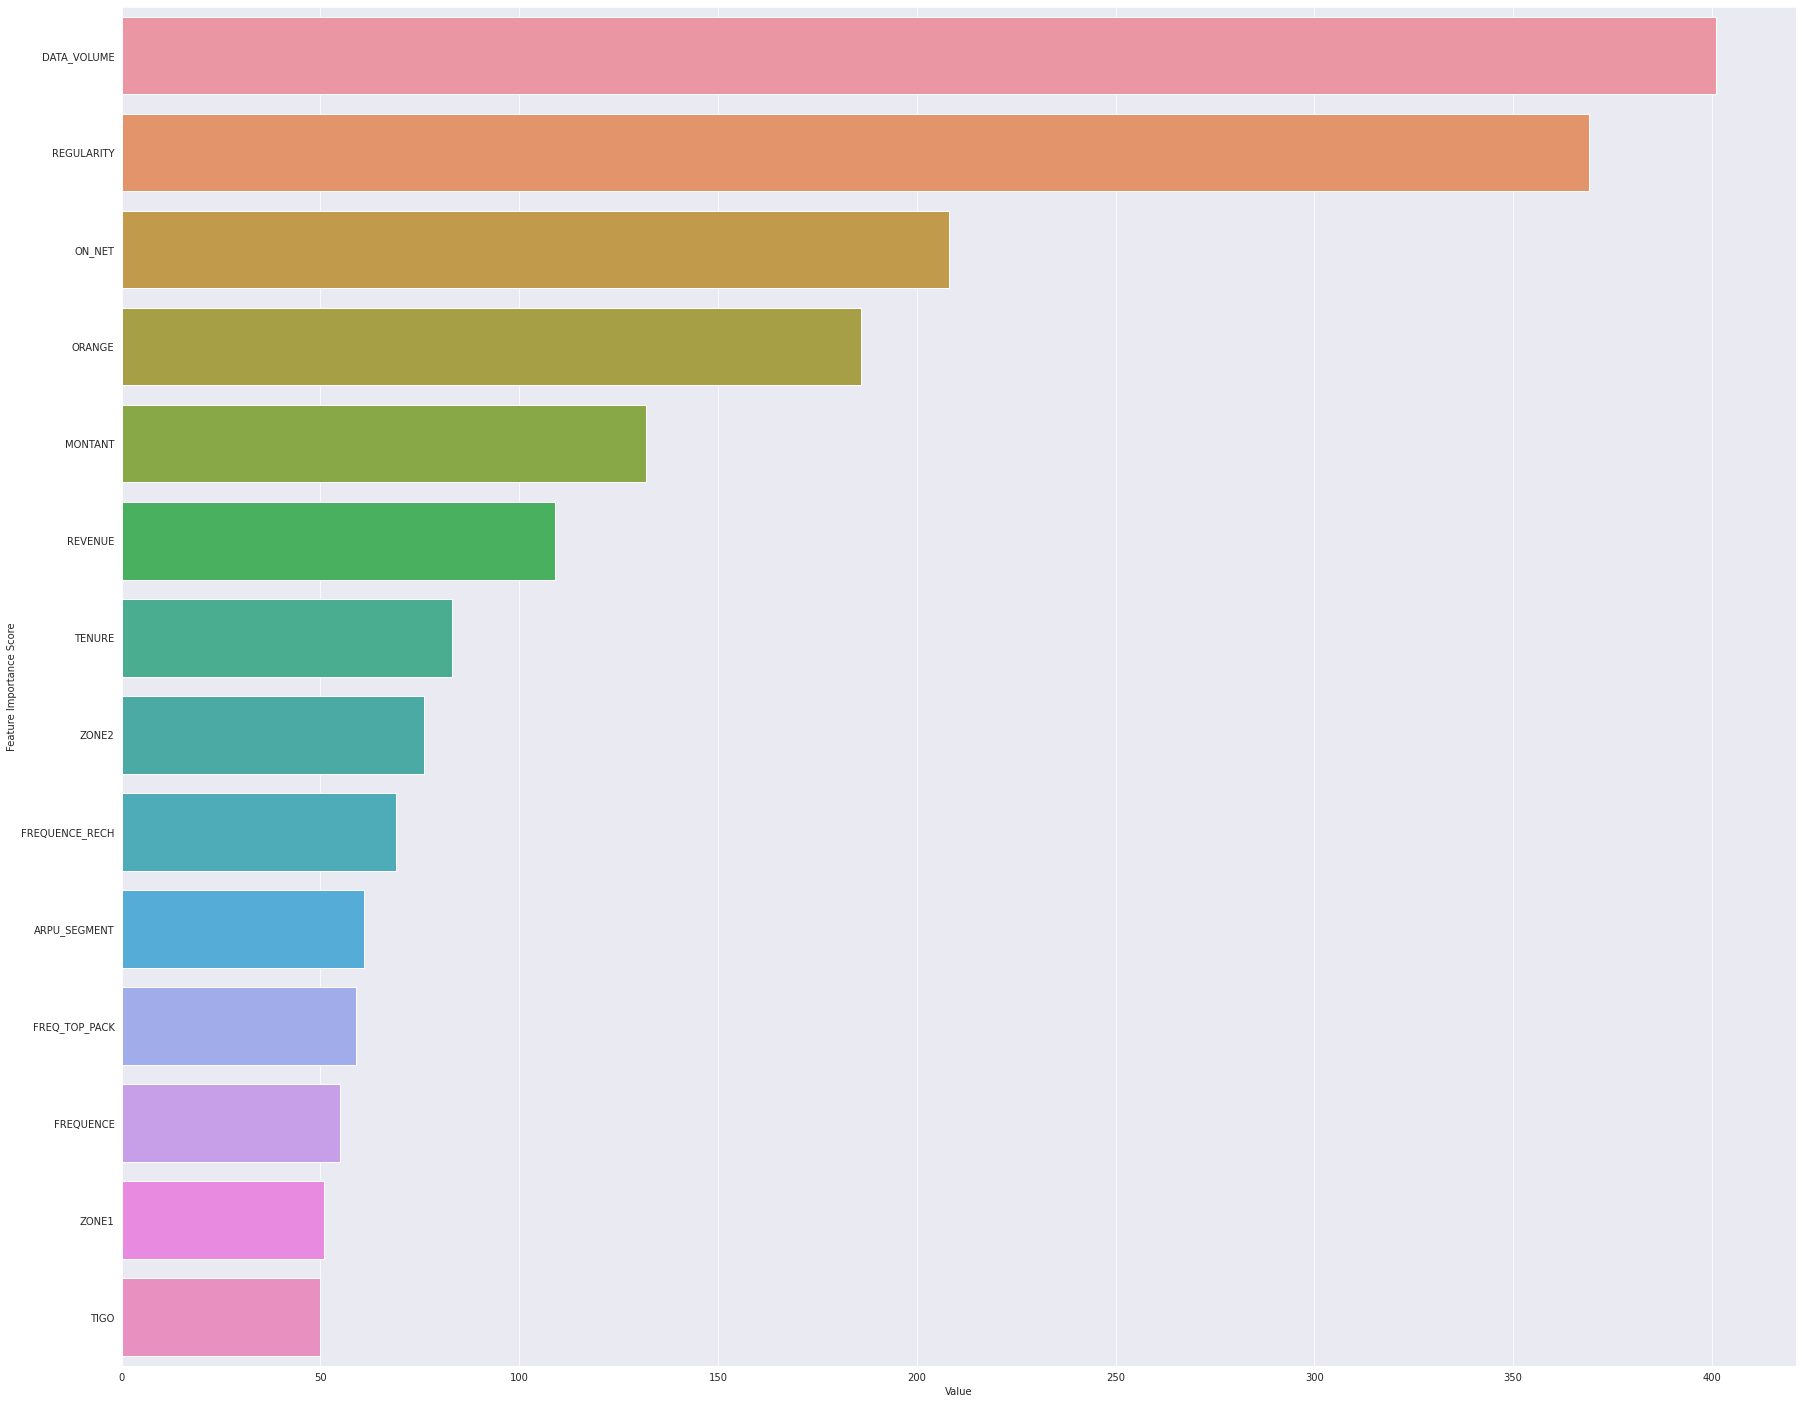

0.9019847323425614 0.9040944410403196 0.0004488574955602754


In [ ]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(objective =  'binary', 
                            metric= 'auc',
                            boosting_type= 'gbdt',
                            lambda_l1= 0.0004912993970392775,
                            lambda_l2= 9.424350138808432,
                            num_leaves= 24,
                            feature_fraction= 1.0,
                            bagging_fraction= 0.9540416539312312,
                            bagging_freq= 7,
                            min_child_samples= 100, n_estimators = 300)

func_= func(x, y, test, lgb_model, 'lgbm', 1000)
val_p3, test_p3, model3 = func_()

In [ ]:
from sklearn.linear_model import  LinearRegression, Ridge, Lasso
stack = np.column_stack((val_p, val_p2, val_p3))
stack_p = np.column_stack((test_p, test_p2, test_p3))
predict = LinearRegression().fit(stack, y).predict(stack_p)

In [ ]:
predict

In [ ]:
submission['CHURN'] = predict

submission.to_csv('solution_stack.csv',index=False)

In [ ]:
##RandomForestClassifier Model

In [ ]:
rand = RandomForestClassifier(bootstrap=True,criterion = "gini",
                              n_jobs=-1,
                              max_depth=7,
                              n_estimators=200,
                              random_state=1,
                             verbose=True)

In [ ]:
#Fit model on data
randmodel = rand.fit(x,y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.8min finished


In [ ]:
#Predict on the X_test data 
randpred = randmodel.predict(test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.4s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    1.4s finished


In [ ]:
print("Acuracy")
accuracy_score(y_test, randpred)

In [ ]:
print("Recall")
recall_score(y_test, randpred)

In [ ]:
print("F1 Score")
f1_score(y_test, randpred)

In [ ]:
confusion_matrix(y_test, randpred)

In [ ]:
#lgbm model

In [ ]:
model = lgb.LGBMClassifier()

In [ ]:
model.fit(x,y)

In [ ]:
#Predict on the X_test data 
lgbmpred = randmodel.predict(test)

In [ ]:
print("Acuracy")
accuracy_score(y_test, lgbmpred)

In [ ]:
log_loss(y_test,lgbmpred)

In [ ]:
# Making a submissio

In [ ]:
submission.head()

In [ ]:
test.head()

In [ ]:
subpred = randmodel.predict(test)

In [ ]:
randpred

In [ ]:
subpred

In [ ]:
submission["CHURN"] = lgbmpred

In [ ]:
submission.head()

In [ ]:
submission.to_csv('submission2.csv', index=False)